# Jupyter PyELISA
Version: 1.0.0a  
Author: Johannes Pettmann
License: GNU General Public License v3

Fits ELISA standards with a 4 parameter sigmoidal function and interpolates the concentration of any unkown samples.

### Data
Each plate data should be supplied as a CSV file. Any file in the data path will be analysed separately in one run. Files in subfolders will be ignored.

### Layout
The layout of the plate can be supplied as layout file. Layout files are CSV files that start with 'layout'. They contain the location and concentrations of the standards and blanks.
Furthermore, they can be used to adjust for any sample position. For example, if the samples are transposed when put on the plate. The results will be correctly oriented.

## Requirements

* Python 3.8<
* numpy, pandas, scipy, matplotlib
* (Optional) ipywidgets for UX. See [here](https://ipywidgets.readthedocs.io/en/latest/user_install.html) for details on how to install.

## Settings
Settings can be adjusted manually (e.g. setting.figure_resolution = 200) or optionally with the ipythonwidget user interface. 
If only text is shown for the cell below, ipythonwidgets are not installed correctly.
* *dilution_factor:* Dilution factor used for samples. Doesn't change the fitting. Default: 1
* *exclude_saturated:* Should oversaturated standards (i.e. OD of standards decreases at increasing doses) be excluded. Default: True
* *extrapolate_top:* How farover the top standard concentration to extrapolate. E.g. for a top standard of 500, 1.5 would allow extrapolation up to 750. Default: 1.0
* *fitting_model:* Fitting model to be used. SigModel5P (5 parameter sigmoidal model) is experimental only. Default: SigModel4P (4 parameter sigmoidal model)
* *data_path:* Folder with data files. Ignores data in subfolders. Default: /data
* *result_path:* Folder where results should be saved: Default: /results
* *data_extension:* Extension of data files. Default: .csv
* *layout_filepath:* Path to layout file. Default: layout_full.csv
* *export_results:* Export results data? Default: False
* *export_figures:* Export figures? Default: False
* *figure_type:* File format for figures. Can be .pdf, .svg, .png. Default: .pdf
* *figure_resolution:* Resolution of figure if using .png. Default: 150

**Note:** Clicking on the number next to a slider lets you change the number directly.

In [1]:
from ux import display_widgets
widgets = display_widgets()

FloatSlider(value=1.0, description='Dilution factor:', max=50.0, min=1.0, step=1.0)

FloatSlider(value=1.0, description='Extrapolation threshold (1 = no extrapolation):', max=10.0, min=1.0)

Checkbox(value=True, description='Exclude saturated standards automatically?', indent=False)

Checkbox(value=True, description='Export figures?', indent=False)

Checkbox(value=True, description='Export results (interpolated concentrations)?', indent=False)

Dropdown(description='Layout:', index=2, options=(('layout_6rows_STDleft', 'layout_6rows_STDleft.csv'), ('layo…

### Read values from interface and/or manually adjust settings
This needs to be executed every time the values above are changed!

In [4]:
from ux import read_widget_values
from settings import Settings

setting = Settings() # Create new settings instance with default parameters
setting.update(read_widget_values(widgets)) # Adjust based on values above

# Manuall adjust settings:
# setting.data_path = '/data'

## Fitting

Run: d77e
Dilution factor: 1.0


Loaded layout file layout_full.csv.
Loaded data file test_data.csv.
No saturated standards identified for dataset test_data.

>>> Start fitting standards <<<


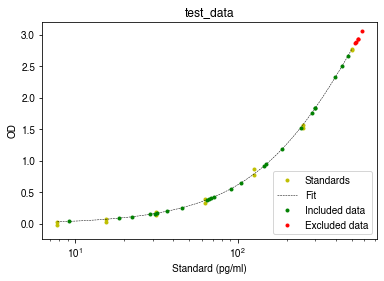


>>> Results exported <<<


In [5]:
import dataset
ds = dataset.Datasets(setting)
ds.load()
ds.fit()

## Results
The results contain the interpolated concentrations of the samples. Samples are rearranged based on layout file. For negative ODs (after blanking) a concentration of 0 is shown. For samples above the top standard (considering the threshold set), 'SATURATED' is shown.

## Troubleshooting
##### The UX cell shows only text
Install ipywidgets correctly. Sometimes an extra step is required to activate it. See their [website](https://ipywidgets.readthedocs.io/en/latest/user_install.html) for help. Updating Jupyter or JupyterLab might also help. For example, JupyterLab 2 did not work for me, but 3 worked without problems.


##### How can I adjust the top standard quickly
Currently, there is no quick way to adjust for different standards. If the standard dilution factor is the same, I suggest adjusting the sample dilution factor. For example, if the dilution factor is 5 and the top standard concentration is 250, but the layout is set to 500, using a dilution factor of 5 instead would give the right results.